# Thyroid Disease Dataset1 (large, cleaned) – Exploratory Data Analysis (EDA)

Focus:
- Feature distributions
- Missing (null) values



## 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

real_path = 'Real_Datasets/cleaned_Thyroid1.csv'
df = pd.read_csv(real_path)

print('Dataset shape:', df.shape)
df.head()

Dataset shape: (3771, 26)


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH measured,TSH,T3 measured,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass
0,41.0,0.0,0,0,0,0,0,0,0,0,...,1,1.30,1,1,125.0,1.0,1.140,1,109.000000,0
1,23.0,0.0,0,0,0,0,0,0,0,0,...,1,4.10,1,1,102.0,0.0,0.995,0,110.469649,0
2,46.0,1.0,0,0,0,0,0,0,0,0,...,1,0.98,0,1,109.0,1.0,0.910,1,120.000000,0
3,70.0,0.0,1,0,0,0,0,0,0,0,...,1,0.16,1,1,175.0,0.0,0.995,0,110.469649,0
4,70.0,0.0,0,0,0,0,0,0,0,0,...,1,0.72,1,1,61.0,1.0,0.870,1,70.000000,0


## 2. Data Types

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3771 entries, 0 to 3770
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3771 non-null   float64
 2   on thyroxine               3771 non-null   int64  
 3   query on thyroxine         3771 non-null   int64  
 4   on antithyroid medication  3771 non-null   int64  
 5   sick                       3771 non-null   int64  
 6   pregnant                   3771 non-null   int64  
 7   thyroid surgery            3771 non-null   int64  
 8   I131 treatment             3771 non-null   int64  
 9   query hypothyroid          3771 non-null   int64  
 10  query hyperthyroid         3771 non-null   int64  
 11  lithium                    3771 non-null   int64  
 12  goitre                     3771 non-null   int64  
 13  tumor                      3771 non-null   int64

## 3. Missing Values

In [3]:
missing_abs = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    'missing_count': missing_abs,
    'missing_percent': missing_pct
})

total_cells = df.shape[0] * df.shape[1]
total_missing = df.isna().sum().sum()

missing_percentage = (total_missing / total_cells) * 100
print("total missing values:", missing_percentage)

missing_df[missing_df.missing_count > 0].head(20)

total missing values: 0.0


,missing_count,missing_percent


## 4. Missing Values Plot

In [4]:
# plt.figure(figsize=(10,5))
# missing_pct[missing_pct > 0].plot(kind='bar')
# plt.ylabel('Missing (%)')
# plt.title('Missing Values per Column')
# plt.tight_layout()
# plt.show()

## 5. Numeric Distributions

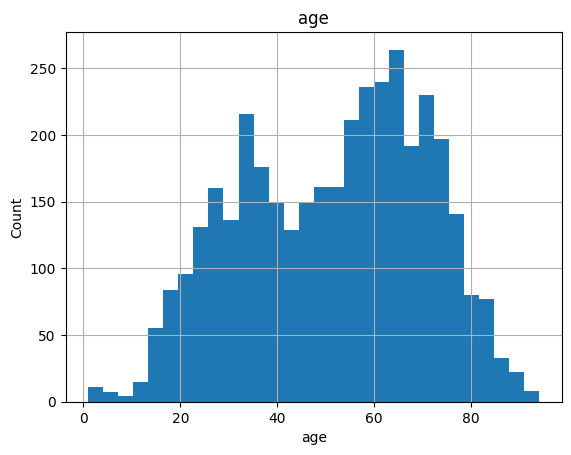

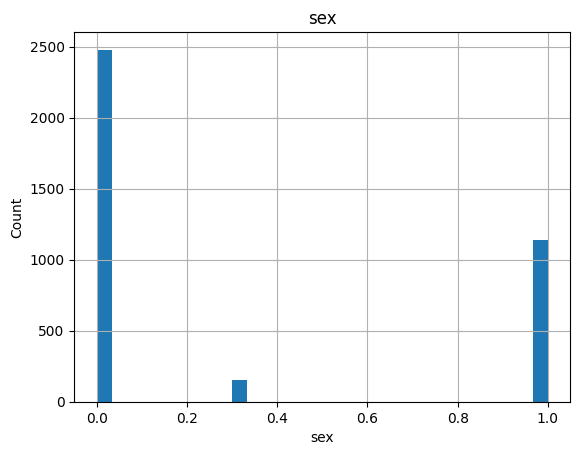

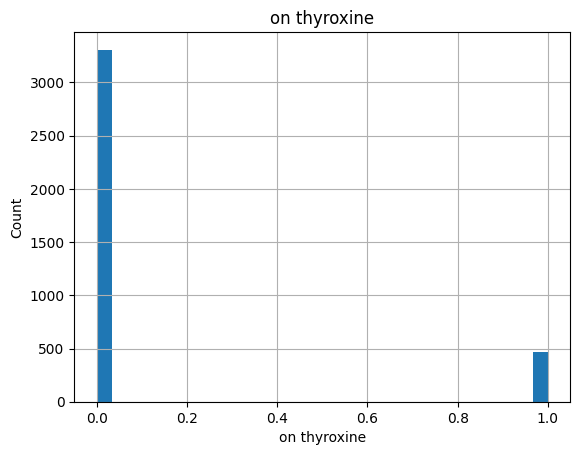

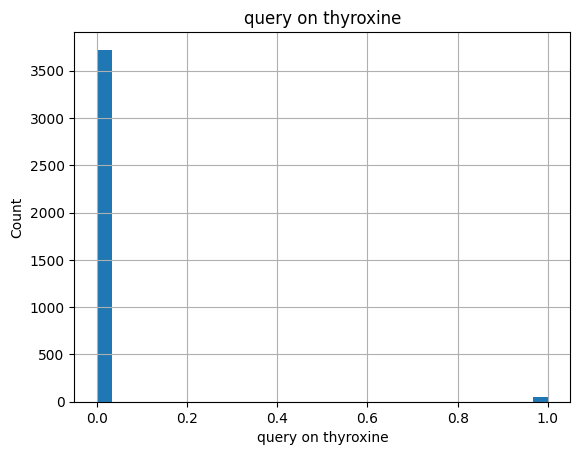

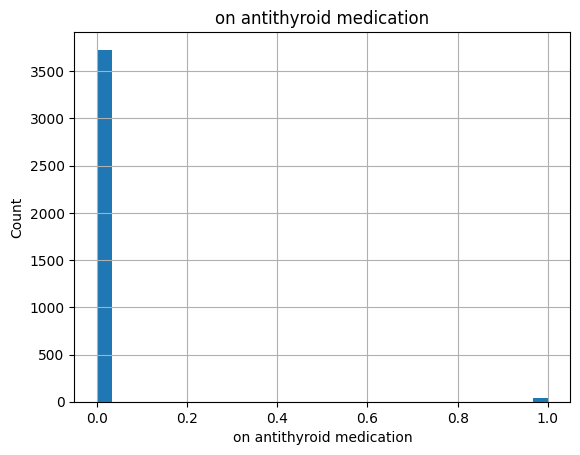

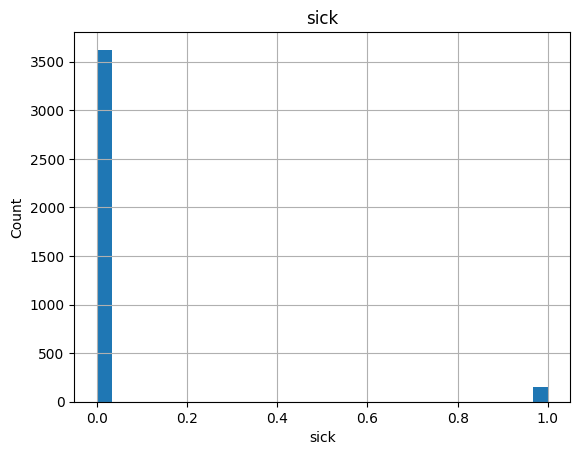

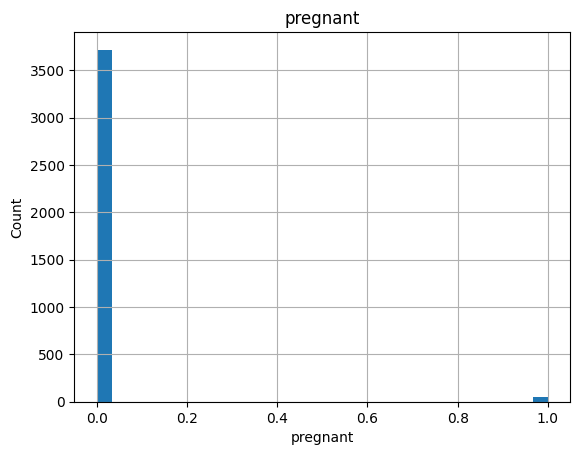

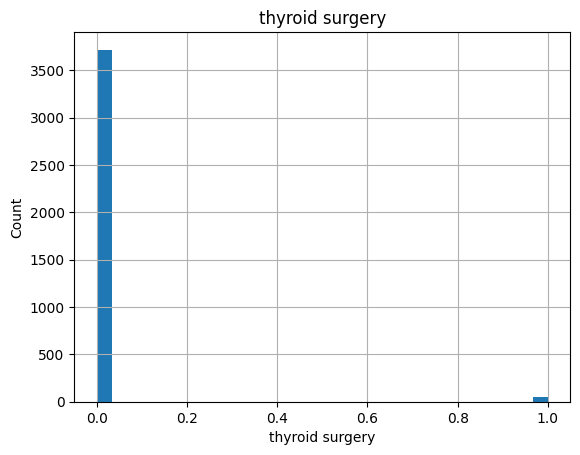

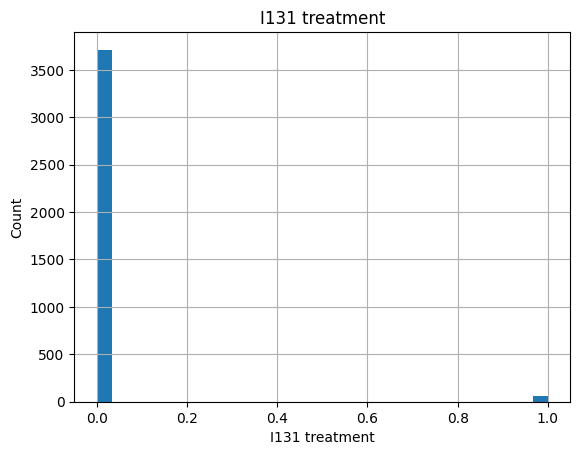

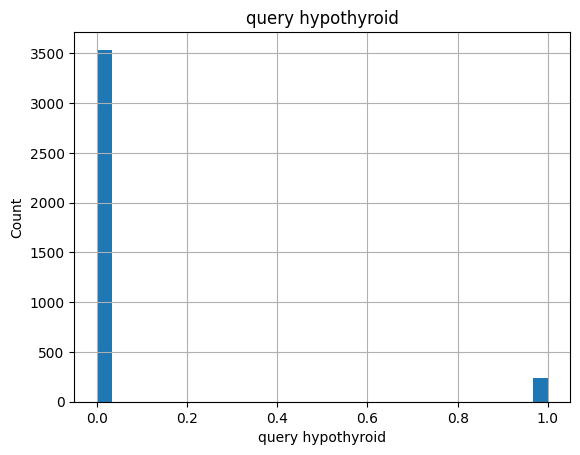

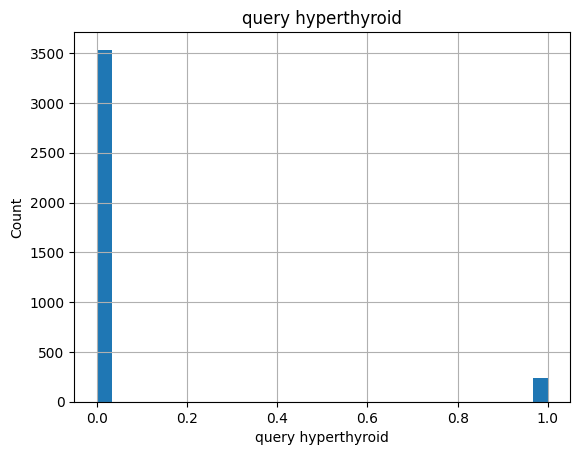

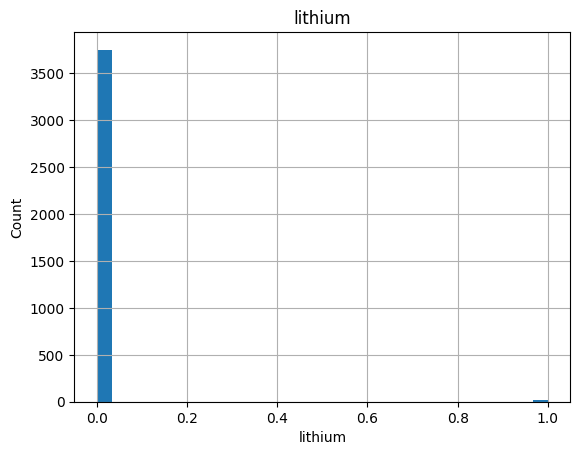

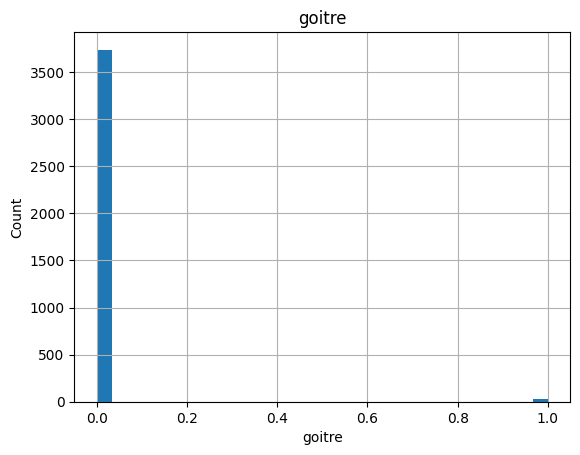

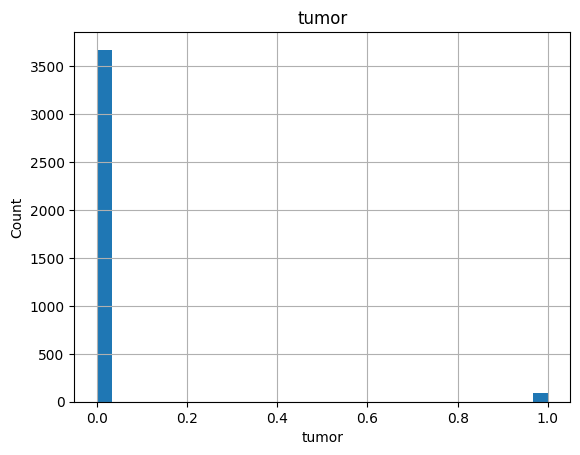

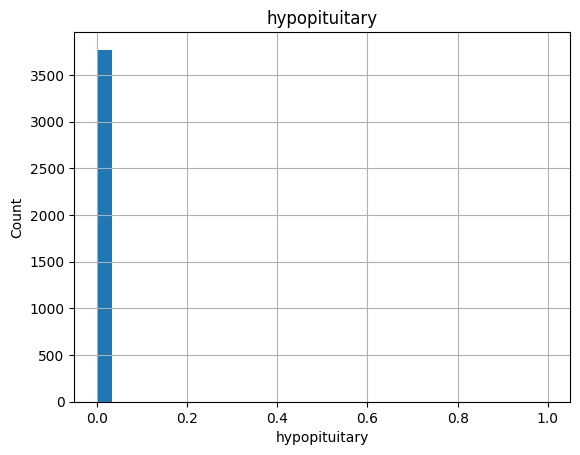

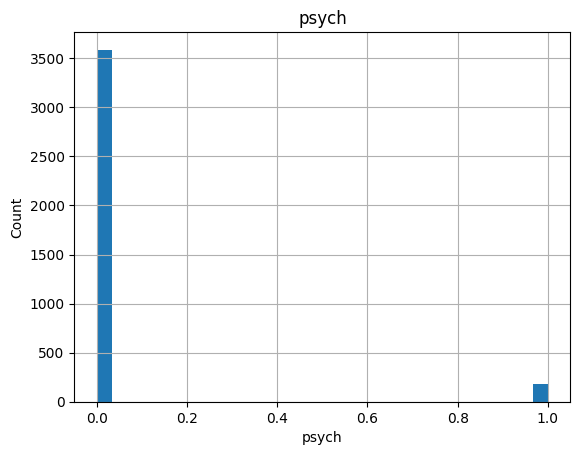

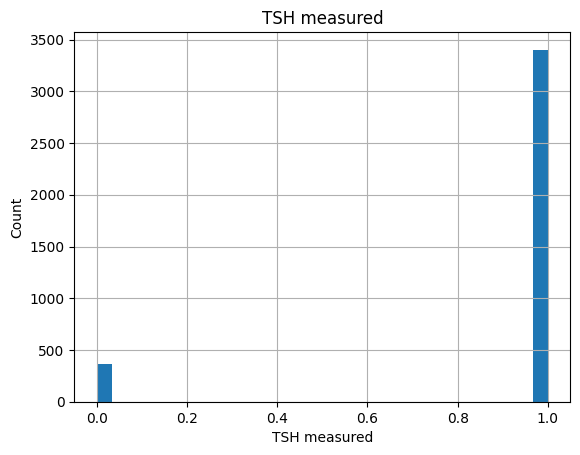

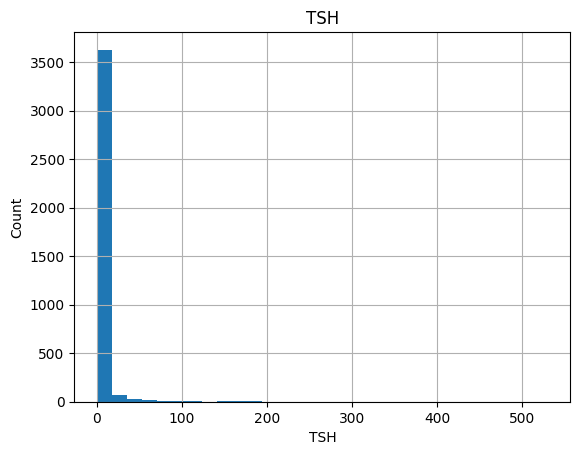

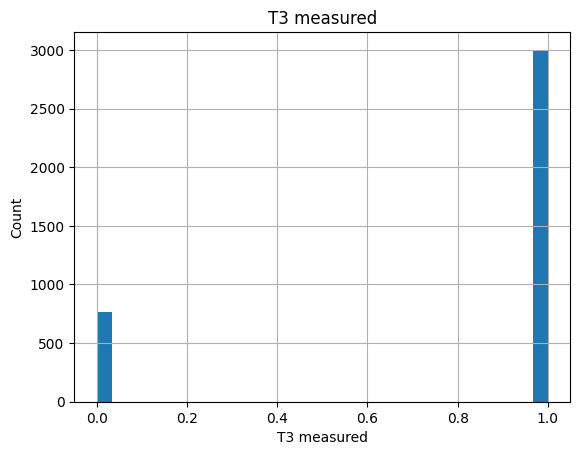

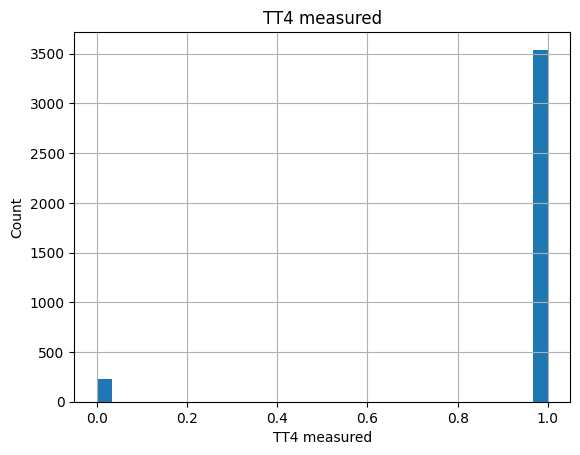

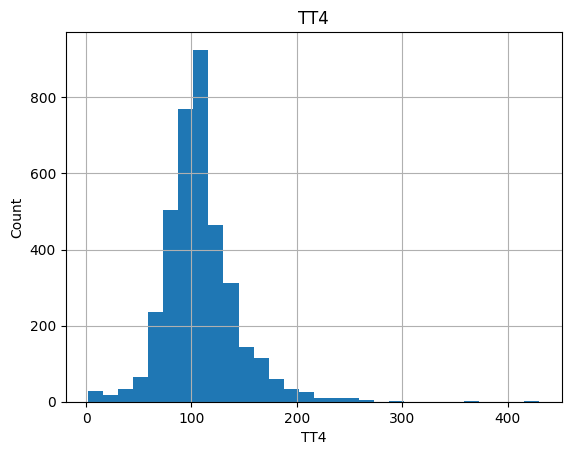

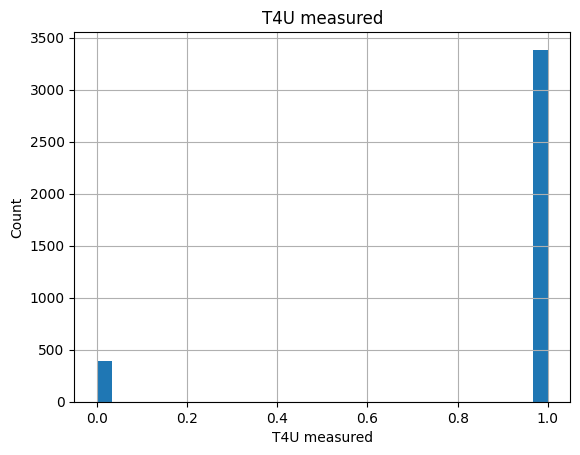

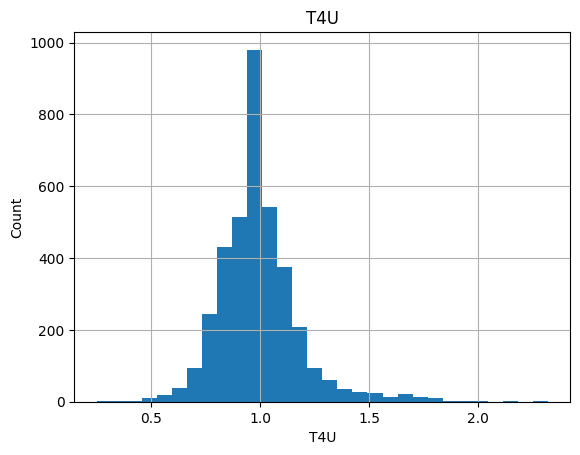

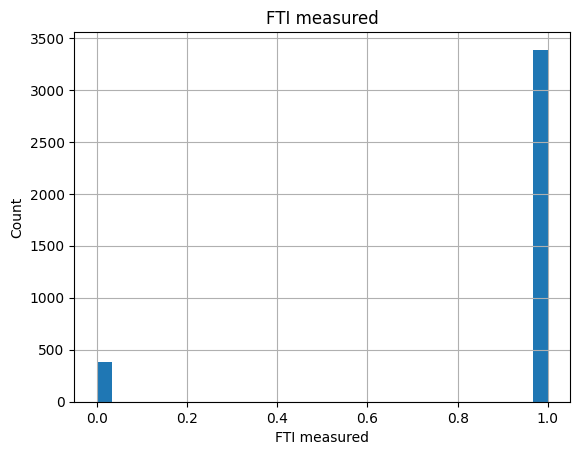

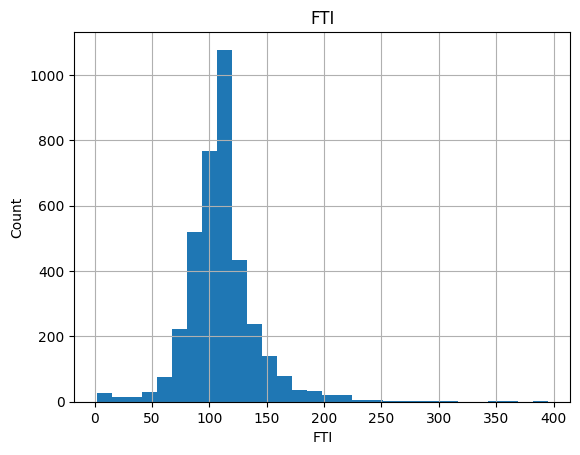

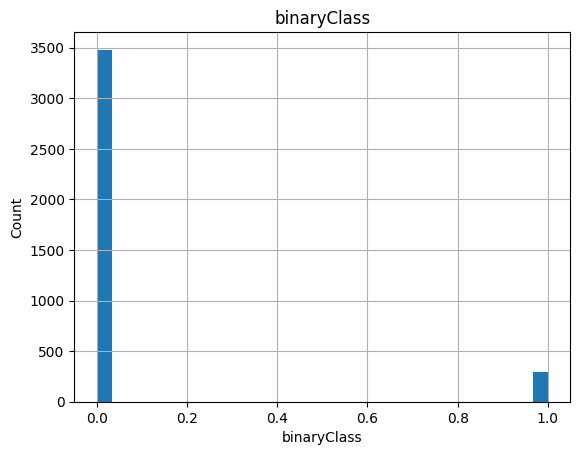

In [5]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure()
    df[col].dropna().hist(bins=30)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## 6. Categorical Distributions

In [6]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts(dropna=False).head(20).plot(kind='bar')
    plt.title(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 7. Notes
- Columns with high missingness may need imputation or removal
- Highly skewed distributions may require transformation before GAN training